In [31]:
import pandas as pd

df = pd.read_csv("new_frequencies.txt", sep=" ", names=["word", "freq"])

letters = []

def letterCol(row):
    return str(row["word"])[0]

def f(row):
    return str(row["word"])[0] == "a"

df[df.apply(f, axis=1)]["freq"].mean()

df["letter"] = df.apply(letterCol, axis=1)



179.93214285714285
66373.20404721754


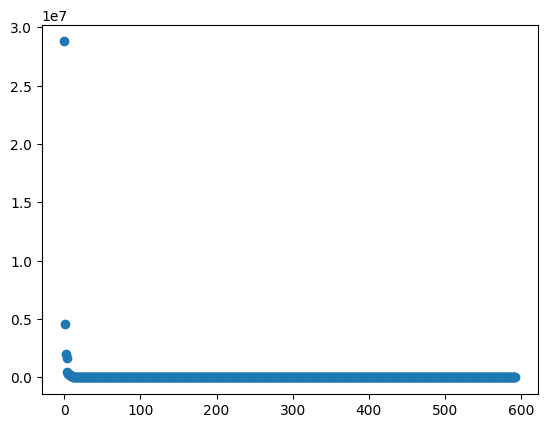

In [33]:
import matplotlib.pyplot as plt

a = df[df["letter"] == "y"]

# a = a[a["freq"] < 1000]

print(a[(a["freq"] < 1000) & (a["freq"] > 10)]["freq"].mean())
print(a["freq"].mean())

# plt.hist(a[a["freq"] < 1000]["freq"], bins=100)

plt.scatter(range(len(a["freq"])), a["freq"])

# plt.hist(a["freq"], bins=10)

(0.0, 100.0)

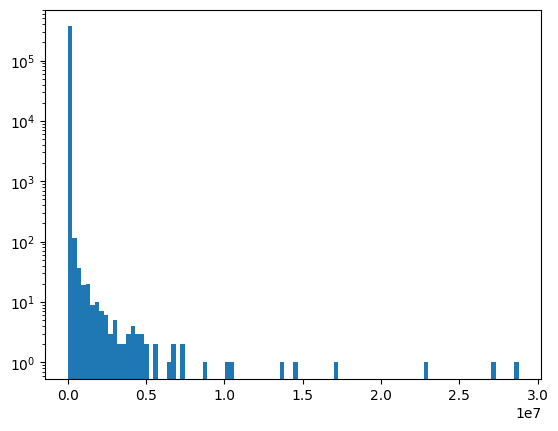

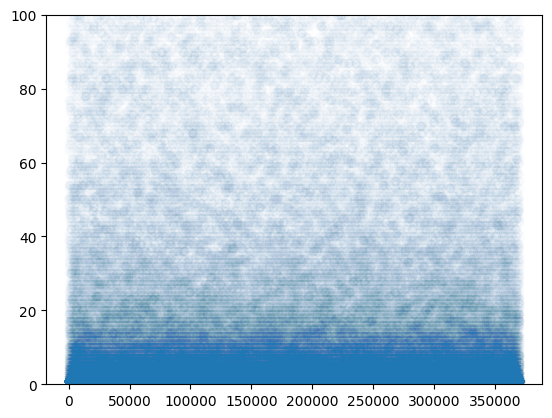

In [17]:
sampled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots()

ax.hist(sampled_df["freq"], bins=100, log=True)
# ax.set_ylim(0, 100)
# ax.set_xlim(0, 10000000)


fig, ax = plt.subplots()

ax.scatter(range(len(sampled_df["word"])), sampled_df["freq"], alpha=0.01)
ax.set_ylim(0, 100)


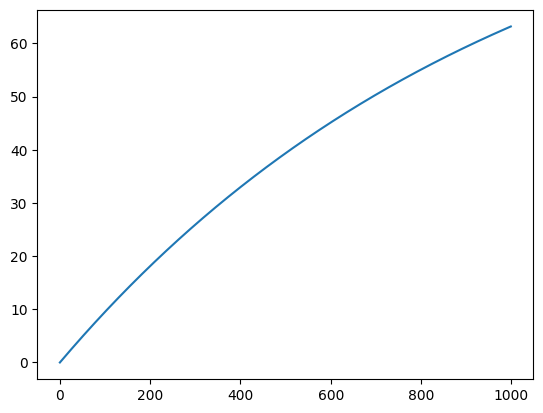

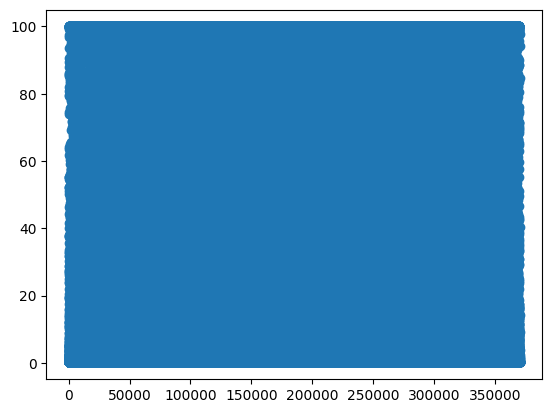

In [6]:

import numpy as np

def fit(data, height=100, ease=1):
    return height*(1.0-np.exp(-ease*pow(data, 1)))

fig, ax = plt.subplots()

ax.plot(np.arange(0, 1000), fit(np.arange(0, 1000), height=100, ease=1/1000))

score = fit(sampled_df["freq"], height=100, ease=1/1000)

fig, ax = plt.subplots()

# ax.hist(score, bins=50)
ax.scatter(range(len(sampled_df["word"])), score)

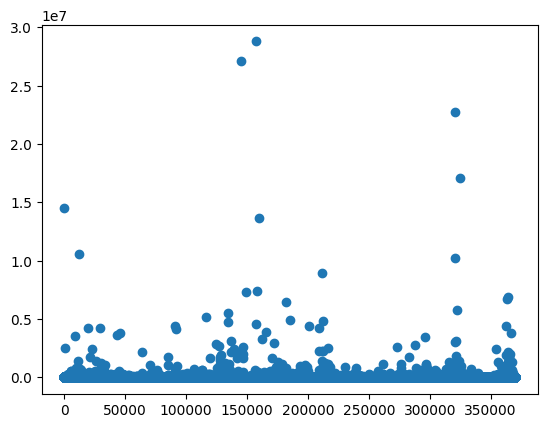

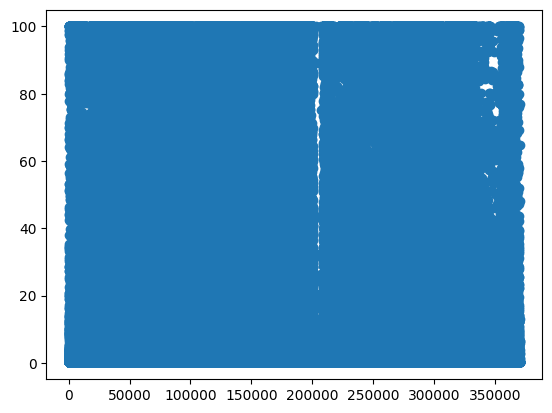

In [7]:
fig, ax = plt.subplots()

ax.scatter(range(0, len(df["word"])), df["freq"])

fig, ax = plt.subplots()

score = fit(df["freq"], height=100, ease=1/1000)

ax.scatter(range(0, len(df["word"])), score)

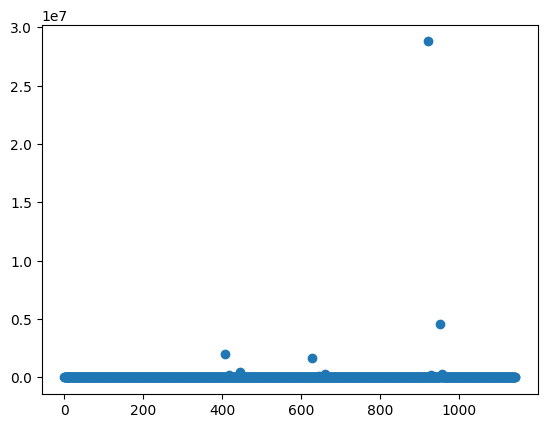

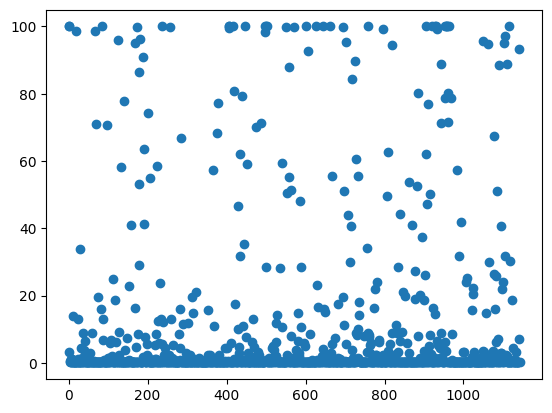

In [8]:
fig, ax = plt.subplots()

ax.scatter(range(0, len(a["word"])), a["freq"])

fig, ax = plt.subplots()

score = fit(a["freq"], height=100, ease=1/1000)

ax.scatter(range(0, len(a["word"])), score)

In [40]:
new_df = pd.read_csv("../wordsChar.csv")

letters = []

def letterCol(row):
    return str(row["word"])[0]

def f(row):
    return str(row["word"])[0] == "a"

# df[df.apply(f, axis=1)]["freq"].mean()

new_df["letter"] = new_df.apply(letterCol, axis=1)

new_df.head()


,index,word,frequency,letter
0,0,a,9081211414,a
1,1,b,419765809,b
2,2,c,596623288,c
3,3,d,361493791,d
4,4,e,593086233,e


28.5


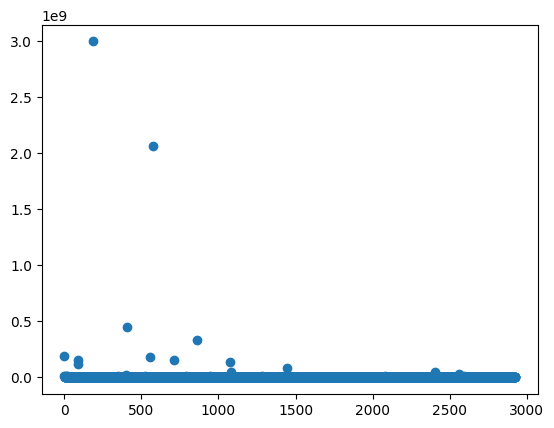

In [37]:
import matplotlib.pyplot as plt

a = new_df[new_df["letter"] == "y"]

# a = a[a["freq"] < 1000]

print(a[(a["frequency"] < 1000) & (a["frequency"] > 10)]["frequency"].mean())
# print(a[a["frequency"] < 1000].mean())

# plt.hist(a[a["freq"] < 1000]["freq"], bins=100)

plt.scatter(range(len(a["frequency"])), a["frequency"])

# plt.hist(a["freq"], bins=10)

(0.0, 100.0)

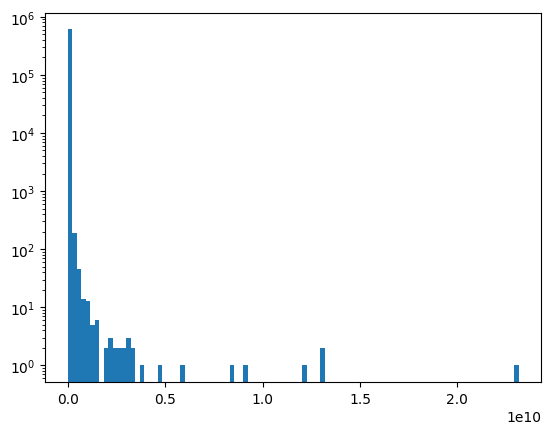

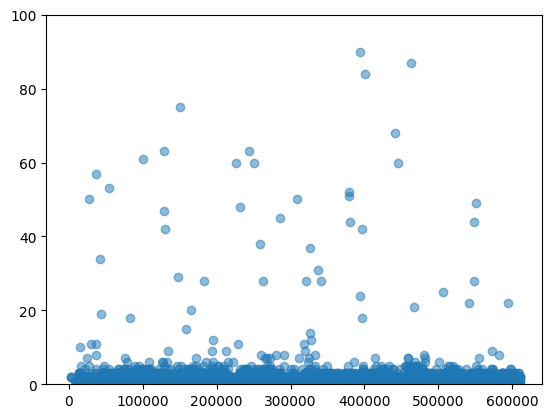

In [26]:
sampled_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots()

ax.hist(sampled_df["frequency"], bins=100, log=True)
# ax.set_ylim(0, 100)
# ax.set_xlim(0, 10000000)


fig, ax = plt.subplots()

ax.scatter(range(len(sampled_df["word"])), sampled_df["frequency"], alpha=0.5)
ax.set_ylim(0, 100)


In [43]:
merged = pd.read_csv("merged.txt", sep=" ", names=["word", "freq"])

merged.head()


,word,freq
0,a,14484562
1,b,22813
2,c,36830
3,d,64304
4,e,31369


(0.0, 100.0)

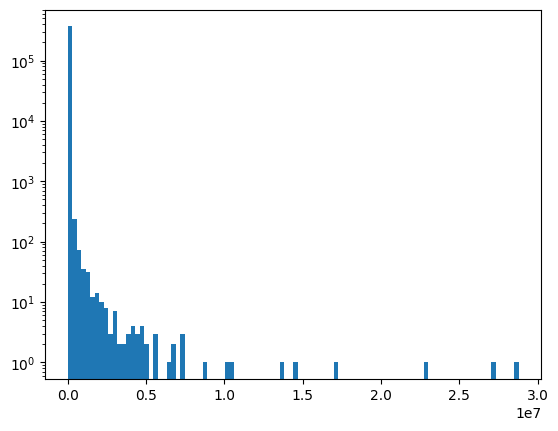

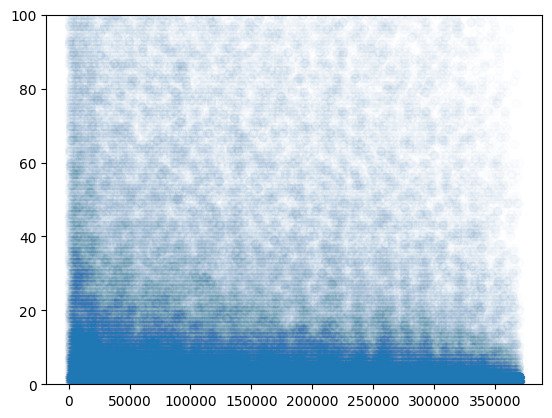

In [46]:
sampled_df = merged.sample(frac=1, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots()

ax.hist(merged["freq"], bins=100, log=True)
# ax.set_ylim(0, 100)
# ax.set_xlim(0, 10000000)


fig, ax = plt.subplots()

ax.scatter(range(len(merged["word"])), merged["freq"], alpha=0.01)
ax.set_ylim(0, 100)
